In [5]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
data = pd.read_csv("./Urban Actuals.csv")
data=data.dropna()
data

,Date,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,01-01-2013,110.5,109.1,113.0,103.6,103.4,102.3,102.9,105.8,105.1,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
1,01-02-2013,112.9,112.9,116.9,104.0,103.5,103.1,104.9,104.1,103.8,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
2,01-03-2013,113.9,111.4,113.2,104.3,102.7,104.9,103.8,103.5,102.6,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0
3,01-04-2013,114.6,113.4,106.0,104.7,102.1,109.5,109.7,104.6,102.0,...,100.5,106.4,106.5,105.7,105.0,104.0,105.2,103.2,105.1,105.7
4,01-05-2013,115.4,114.2,102.7,105.5,101.5,110.6,123.7,105.2,101.9,...,100.5,107.2,107.1,106.2,103.9,104.6,105.7,102.6,104.9,106.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,01-11-2022,168.4,213.4,183.2,172.3,180.0,162.6,205.5,171.0,123.4,...,171.8,180.3,166.9,175.8,158.9,166.7,171.5,173.8,167.4,174.1
118,01-12-2022,170.2,212.9,191.9,173.9,179.1,159.5,178.7,171.3,123.1,...,170.7,180.6,167.3,177.2,159.4,167.1,171.8,176.0,168.2,174.1
119,01-01-2023,173.3,215.2,197.0,175.2,178.0,160.5,175.3,171.2,122.7,...,172.1,180.1,168.0,178.5,159.5,167.8,171.8,178.8,168.9,174.9
120,01-02-2023,174.7,212.2,177.2,177.9,172.2,172.1,175.8,172.2,121.9,...,173.5,182.8,169.2,180.8,159.8,168.4,172.5,181.4,170.0,176.3


In [7]:
data.columns=data.columns.str.strip()
data.columns=data.columns.str.replace(" ","_")
data.columns

Index(['Date', 'Cereals_and_products', 'Meat_and_fish', 'Egg',
       'Milk_and_products', 'Oils_and_fats', 'Fruits', 'Vegetables',
       'Pulses_and_products', 'Sugar_and_Confectionery', 'Spices',
       'Non-alcoholic_beverages', 'Prepared_meals,_snacks,_sweets_etc.',
       'Food_and_beverages', 'Pan,_tobacco_and_intoxicants', 'Clothing',
       'Footwear', 'Clothing_and_footwear', 'Housing', 'Fuel_and_light',
       'Household_goods_and_services', 'Health', 'Transport_and_communication',
       'Recreation_and_amusement', 'Education', 'Personal_care_and_effects',
       'Miscellaneous', 'General_index'],
      dtype='object')

In [8]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)
#data=data.set_index('Date')
data.head()

,Date,Cereals_and_products,Meat_and_fish,Egg,Milk_and_products,Oils_and_fats,Fruits,Vegetables,Pulses_and_products,Sugar_and_Confectionery,...,Housing,Fuel_and_light,Household_goods_and_services,Health,Transport_and_communication,Recreation_and_amusement,Education,Personal_care_and_effects,Miscellaneous,General_index
0,2013-01-01,110.5,109.1,113.0,103.6,103.4,102.3,102.9,105.8,105.1,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
1,2013-02-01,112.9,112.9,116.9,104.0,103.5,103.1,104.9,104.1,103.8,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
2,2013-03-01,113.9,111.4,113.2,104.3,102.7,104.9,103.8,103.5,102.6,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0
3,2013-04-01,114.6,113.4,106.0,104.7,102.1,109.5,109.7,104.6,102.0,...,100.5,106.4,106.5,105.7,105.0,104.0,105.2,103.2,105.1,105.7
4,2013-05-01,115.4,114.2,102.7,105.5,101.5,110.6,123.7,105.2,101.9,...,100.5,107.2,107.1,106.2,103.9,104.6,105.7,102.6,104.9,106.6


In [9]:
data_filtered=pd.DataFrame(data[['Date','Food_and_beverages']])
data_filtered

,Date,Food_and_beverages
0,2013-01-01,105.9
1,2013-02-01,107.2
2,2013-03-01,107.3
3,2013-04-01,108.8
4,2013-05-01,111.1
...,...,...
117,2022-11-01,181.3
118,2022-12-01,178.6
119,2023-01-01,179.5
120,2023-02-01,180.7


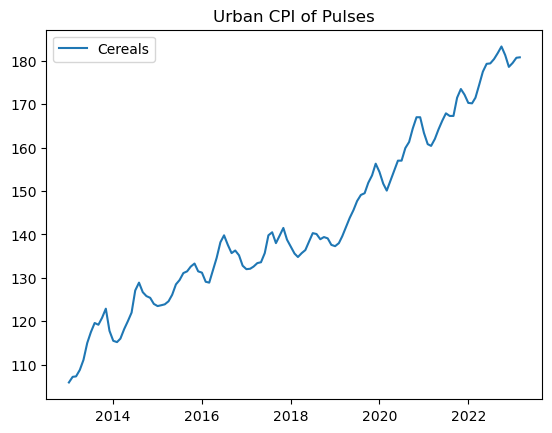

In [10]:
plt.plot(data_filtered['Date'],data_filtered['Food_and_beverages'],label='Cereals')
plt.title("Urban CPI of Pulses")
plt.legend(loc="upper left")

<Figure size 4000x1600 with 0 Axes>

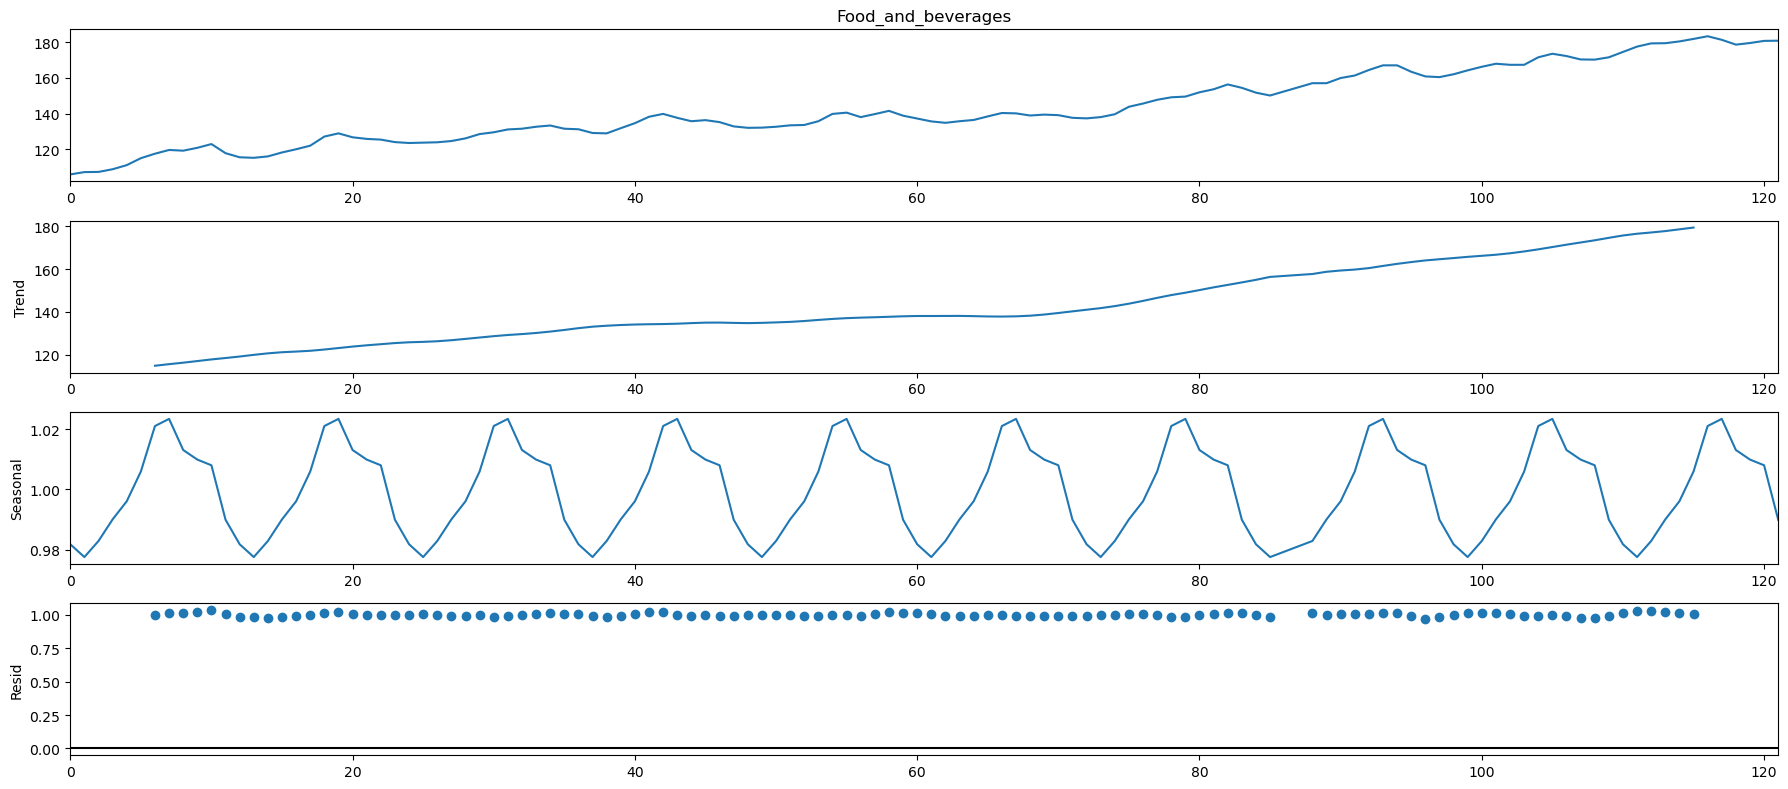

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose


rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = data_filtered['Food_and_beverages']
result = seasonal_decompose(series, model='mutiplicative',period=12)
result.plot();

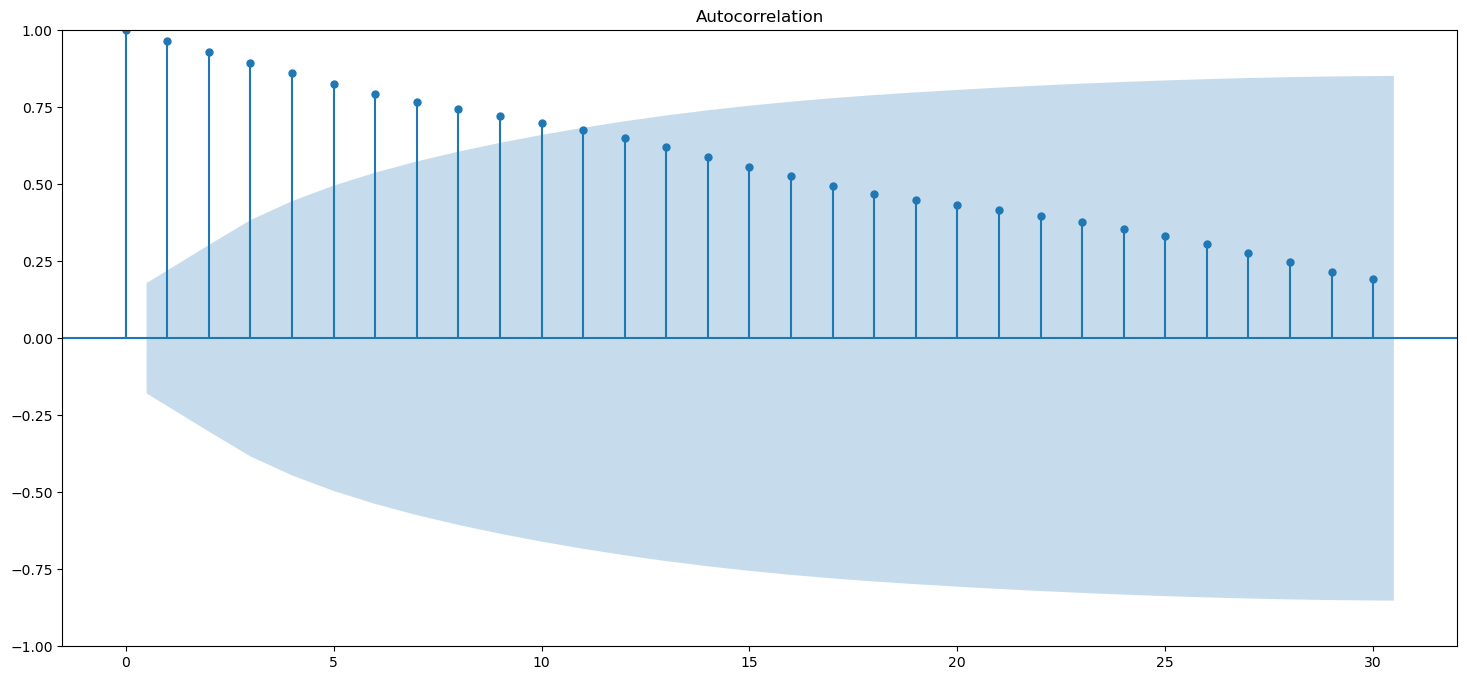

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_filtered['Food_and_beverages'], lags=30); #q=10

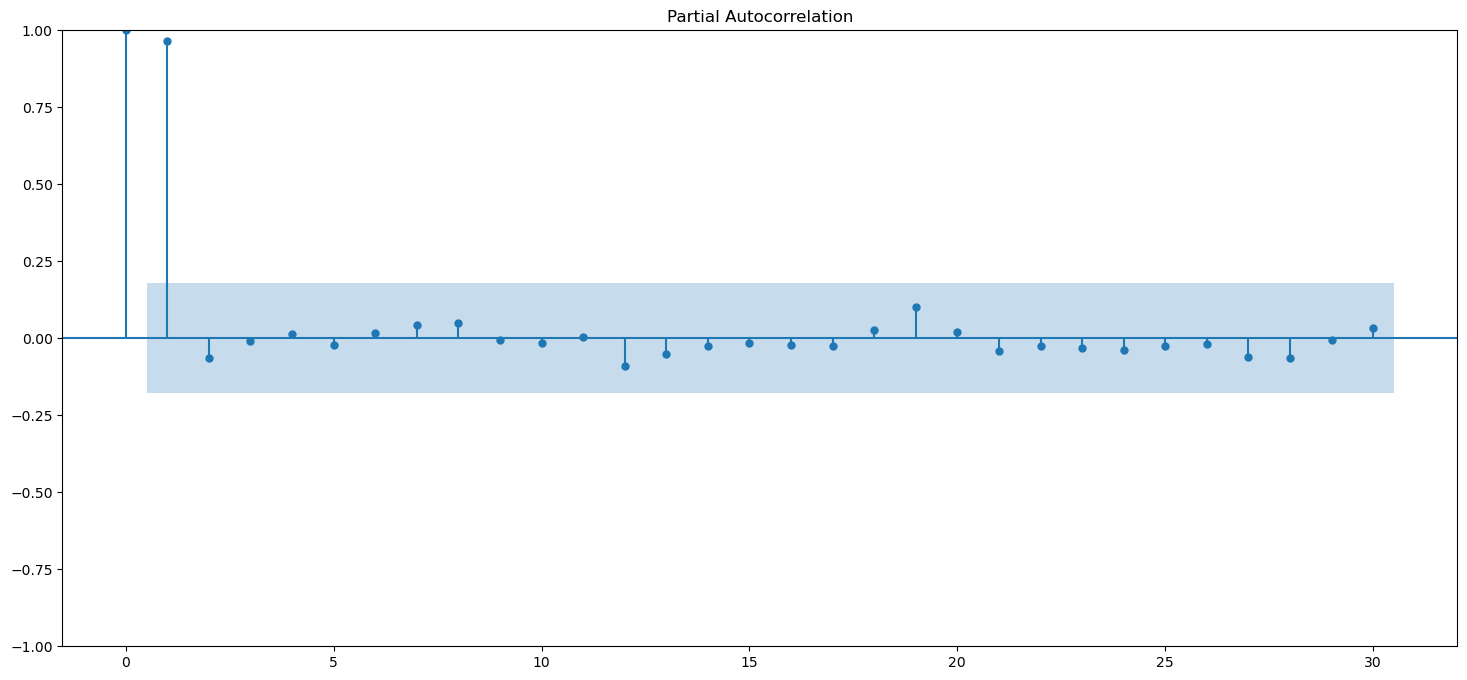

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(data_filtered['Food_and_beverages'], lags=30, method='ywm'); #p=2

In [14]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(data_filtered['Food_and_beverages'])
print("p-value: ",result[1])

result=adfuller(data_filtered['Food_and_beverages'].diff().dropna())
print("p-value: ",result[1])

result=adfuller(data_filtered['Food_and_beverages'].diff().diff().dropna())
print("p-value: ",result[1])

p-value:  0.9911988835435269
p-value:  0.0904946812333931
p-value:  5.015347748605861e-13


In [15]:
#train-test split


forecast_horizon=6
train=data_filtered[0:(len(data_filtered)-forecast_horizon)]
test=data_filtered[len(train):]

#print(train)
print(test)
print(train.shape)
print(test.shape)

          Date  Food_and_beverages
116 2022-10-01               183.3
117 2022-11-01               181.3
118 2022-12-01               178.6
119 2023-01-01               179.5
120 2023-02-01               180.7
121 2023-03-01               180.8
(114, 2)
(6, 2)


In [16]:
'''import itertools
import statsmodels.api as sm

#set parameter range
p = range(0,2)
q = range(0,10)
d = range(1,2)
s = range(6,12)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train['Cereals_and_products'],
                                    order=param,
                                    seasonal_order=param_seasonal,
                                    enforce_stationarity=True,
                                    enforce_invertibility=False)
            
            results = mod.fit()
            print('SARIMA{},{} - AIC:{}, MSE:{}'.format(param, param_seasonal, results.aic, results.mse))
        except:
            continue'''

"import itertools\nimport statsmodels.api as sm\n\n#set parameter range\np = range(0,2)\nq = range(0,10)\nd = range(1,2)\ns = range(6,12)\n# list of all parameter combos\npdq = list(itertools.product(p, d, q))\nseasonal_pdq = list(itertools.product(p, d, q, s))\n# SARIMA model pipeline\nfor param in pdq:\n    for param_seasonal in seasonal_pdq:\n        try:\n            mod = sm.tsa.statespace.SARIMAX(train['Cereals_and_products'],\n                                    order=param,\n                                    seasonal_order=param_seasonal,\n                                    enforce_stationarity=True,\n                                    enforce_invertibility=False)\n            \n            results = mod.fit()\n            print('SARIMA{},{} - AIC:{}, MSE:{}'.format(param, param_seasonal, results.aic, results.mse))\n        except:\n            continue"

In [38]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train['Food_and_beverages'],
                        order=(3,1,4),
                        seasonal_order=(3,1,4,12),
                        enforce_stationarity=True,
                        enforce_invertibility=False)

results = mod.fit()
print(results.summary())


y_pred=results.predict(start=test['Food_and_beverages'].index[0],end=test['Food_and_beverages'].index[-1])
print(y_pred)

D:\Anaconda\envs\major\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\envs\major\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\envs\major\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
D:\Anaconda\envs\major\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                 Food_and_beverages   No. Observations:                  114
Model:             SARIMAX(3, 1, 4)x(3, 1, 4, 12)   Log Likelihood                -192.373
Date:                            Sat, 03 Jun 2023   AIC                            414.745
Time:                                    00:58:18   BIC                            453.972
Sample:                                         0   HQIC                           430.625
                                            - 114                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3894      2.115      0.657      0.511      -2.755       5.534
ar.L2         -1.4310      1.807   

D:\Anaconda\envs\major\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

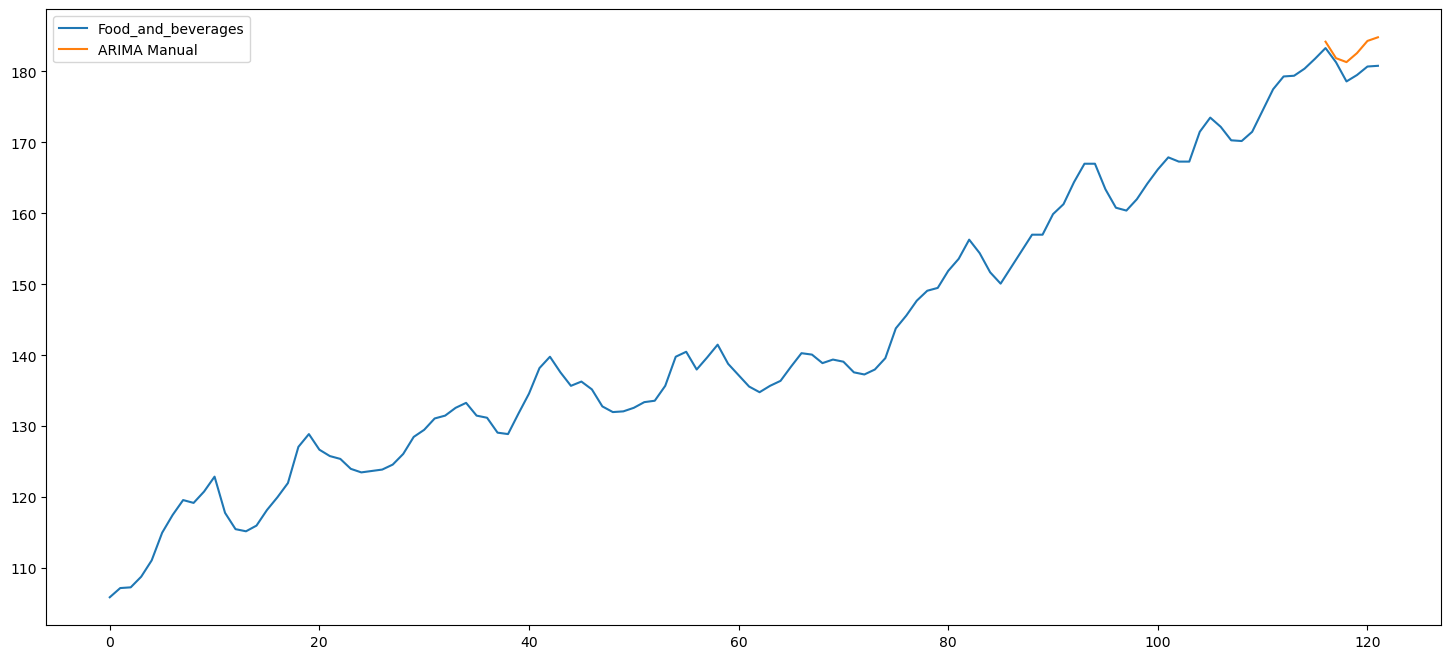

In [39]:
data_copy=data_filtered.copy()
data_copy['ARIMA Manual']=[None]*len(train)+list(y_pred)
val=['Food_and_beverages','ARIMA Manual']
data_copy[val].plot()

In [40]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import math

'''mape_12=mean_absolute_percentage_error(test['Cereals_and_products'],y_pred)*100
mae_12=mean_absolute_error(test['Cereals_and_products'],y_pred)
rmse_12=math.sqrt(mean_squared_error(test['Cereals_and_products'],y_pred))

print("12 Months")
print("mape: ",mape_12)
print("\nmae: ",mae_12)
print("\nrmse: ",rmse_12)'''


mape_6=mean_absolute_percentage_error(test['Food_and_beverages'].head(6),y_pred.head(6))*100
mae_6=mean_absolute_error(test['Food_and_beverages'].head(6),y_pred.head(6))
rmse_6=math.sqrt(mean_squared_error(test['Food_and_beverages'].head(6),y_pred.head(6)))

print("\n6 Months")
print("mape: ",mape_6)
print("\nmae: ",mae_6)
print("\nrmse: ",rmse_6)


6 Months
mape:  1.379312501060774

mae:  2.4864701645854126

rmse:  2.8069009823269426
